In [2]:
# Hier muss erst der der df angegeben werden!!! Und die Importe, das Übliche eben.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleaned_air_quality_data_2025_03_20.csv')
df.head()


,Year,Month,Day,Country,City,Latitude,Longitude,Co,No2,O3,...,So2,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.06667,15.45000,0.1,9.0,NaN,...,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26266,11.39454,0.1,25.6,NaN,...,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.30639,14.28611,0.1,14.2,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.79941,13.04399,0.1,21.1,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.20849,16.37208,0.1,9.0,NaN,...,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TypeError: WindroseAxes.set_legend() takes 1 positional argument but 2 were given

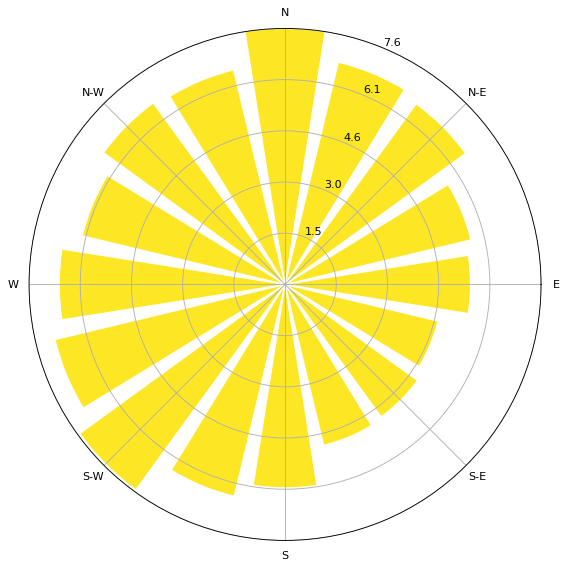

In [4]:
# Kurzer Neugierigkeitsexkurs zur Verteilung der Windrichtungen:
from windrose import WindroseAxes

# Entferne NaN-Werte aus Wdir
wind_dir = df["Wdir"].dropna()

# Dummy-Windgeschwindigkeit von 1 m/s für alle Einträge (nur zur Visualisierung notwendig)
wind_speed_dummy = np.ones_like(wind_dir)

# Erzeuge Windrose
ax = WindroseAxes.from_ax()
ax.bar(wind_dir, wind_speed_dummy, normed=True, opening=0.8, edgecolor='white')

# Formatierung
ax.set_legend(False)
plt.title("Windrose: Häufigkeit der Windrichtungen");


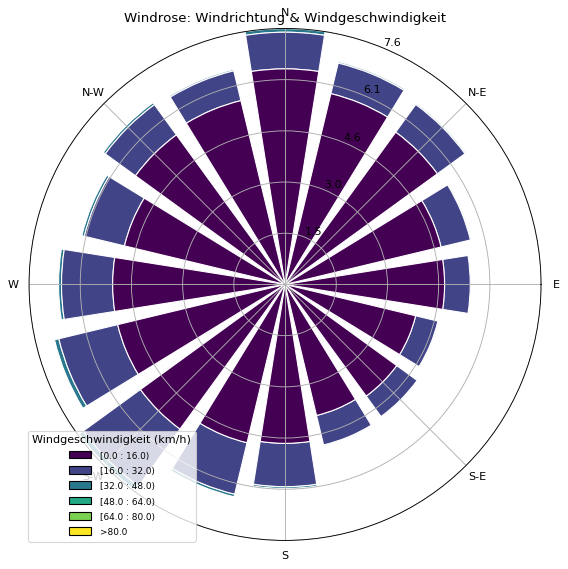

In [8]:
# Windrose für Wspd und Wdir zusammen:

wdir = df["Wdir"].dropna()
wspd = df["Wspd"].dropna()

wind_df = df[["Wdir", "Wspd"]].dropna()

ax = WindroseAxes.from_ax()
ax.bar(wind_df["Wdir"], wind_df["Wspd"], normed=True, opening=0.8, edgecolor='white')

# Legende und Titel
ax.set_legend(title="Windgeschwindigkeit (km/h)")
plt.title("Windrose: Windrichtung & Windgeschwindigkeit");


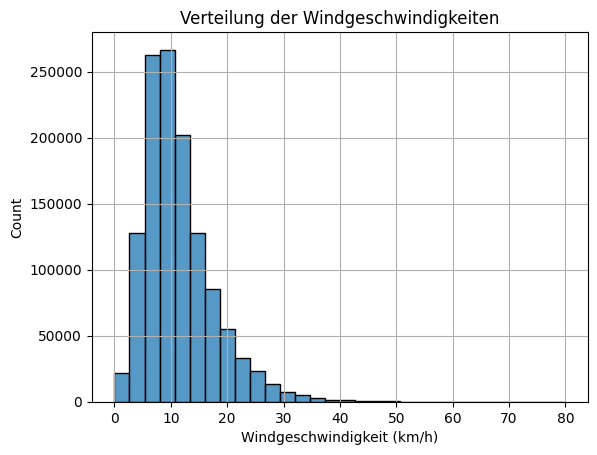

In [7]:
sns.histplot(df["Wspd"].dropna(), bins=30)
plt.xlabel("Windgeschwindigkeit (km/h)")
plt.title("Verteilung der Windgeschwindigkeiten")
plt.grid(True);


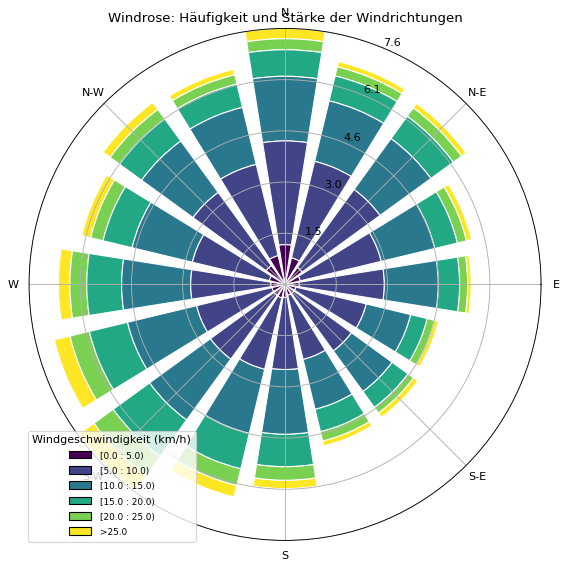

In [10]:
# Sicherstellen, dass keine NaNs enthalten sind
wind_df = df[["Wdir", "Wspd"]].dropna()

# Benutzerdefinierte Bins im häufigsten Bereich
custom_bins = [0, 5, 10, 15, 20, 25]

# Windrose plotten
ax = WindroseAxes.from_ax()
ax.bar(
    wind_df["Wdir"],
    wind_df["Wspd"],
    bins=custom_bins,
    normed=True,
    opening=0.8,
    edgecolor="white"
)

# Legende und Formatierung
ax.set_legend(title="Windgeschwindigkeit (km/h)")
plt.title("Windrose: Häufigkeit und Stärke der Windrichtungen");